# corrLib.py document

* corrLib collects all the functions that are used in quantifying correlation length and density fluctuation

### corrS(X, Y, U, V)
X, Y, U, V represent a vector field. Return value CA, CV are matrices representing spatial angle and velocity correlation distribution of given vector field.

In [3]:
from corrLib import *
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
X = np.linspace(0, 50)
Y = np.linspace(0, 50)
X, Y = np.meshgrid(X, Y)
U = np.random.random(size=X.shape)
V = np.random.random(size=X.shape)
CA, CV = corrS(X, Y, U, V)

### corrI(X, Y, I)
X, Y, I represents the intensity field of an image. Returns the intensity correlation distribution of given intensity field.

In [5]:
I = np.random.random(size=X.shape)
XI, YI, CI = corrI(X, Y, I)

### divide_windows(img, windowsize=[20, 20], step=10)
Divides an image into small boxes with given step length (overlap is allowed).
* img: a 2D array 
* windowsize: \[horizontal, vertical\] dimensions of the boxes to be divided, in unit of pixel
* step: interval between adjacent boxes, in unit of pixel

In [11]:
img = np.random.random(size=(500, 500))
X, Y, I = divide_windows(img, windowsize=[100, 100], step=100)
print('img size: ' + str(img.shape) + '\ndivided image I size: ' + str(I.shape))

img size: (500, 500)
divided image I size: (4, 4)


### distance_corr(X, Y, C)
X, Y, C represent a directional correlation distribution. Returns a scalar correlation distribution (as a pandas.DataFrame).
* Column R: distance
* Column C: correlation

In [14]:
CI = corrI(X, Y, I)
dc = distance_corr(X, Y, CI)
dc.head()

,R,C
0,0.000000,1.000000
1,100.000000,0.128203
4,100.000000,-0.320452
5,141.421356,-0.439222
2,200.000000,0.113122


### corrIseq(folder, **kwargs)
Calculates the spatial intensity correlation distribution for an image sequence (a series of _\*.tif_ images) in a given _folder_. Returns a pandas.DataFrame containing X, Y, I, Correlation, distance and frame number \[X, Y, I, C, R, frame\].

#### \*\*kwargs:
* windowsize: \[horizontal, vertical\] dimensions of the boxes to be divided, passed to function divide_windows(img)
* step: interval between adjacent boxes, passed to function divide_windows(img)

In [25]:
data_seq = corrIseq(folder)
data_seq.head()

,X,Y,I,C,R,frame
0,0.0,0.0,525.5944,1.000000,0.0,0
1,100.0,0.0,527.5859,0.950538,100.0,0
2,200.0,0.0,526.7618,0.900444,200.0,0
3,300.0,0.0,524.3661,0.846798,300.0,0
4,400.0,0.0,528.0216,0.783501,400.0,0


### readseq(folder)
Read image sequence in given folder and sort the sequence by name. Return a pandas.DataFrame containing (file name, full directory).

In [17]:
folder = r'I:\Google Drive\Research projects\DF\nolight-light'
l = readseq(folder)
l.head()

,Name,Dir
0,0000,I:\Google Drive\Research projects\DF\nolight-l...
1,0001,I:\Google Drive\Research projects\DF\nolight-l...
2,0002,I:\Google Drive\Research projects\DF\nolight-l...
3,0003,I:\Google Drive\Research projects\DF\nolight-l...
4,0004,I:\Google Drive\Research projects\DF\nolight-l...


### data = boxsize_effect_spatial(img, boxsize, mpp)
* img: the image to be tested, array-like
* boxsize: a list of boxsize to be tested, list-like
* mpp: microns per pixel, float

<IPython.core.display.Javascript object>


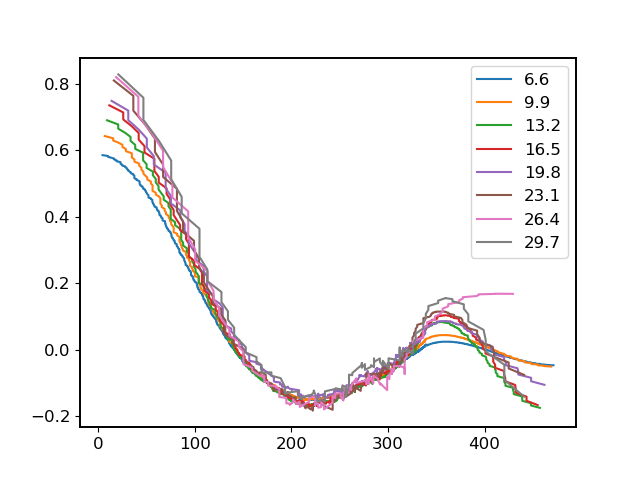

In [4]:
%matplotlib nbagg
img = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = range(20, 100, 10)
mpp= 0.33
data = boxsize_effect_spatial(img, boxsize, mpp)

### density_fluctuation(img8)
Calculate density (intensity) fluctuation of an 8-bit grayscale image. 
* img8: 8-bit grayscale image
* return: a pandas.DataFrame object with columns "n" and "d" representing average box density and standard deviation of box density (\Delta N)

In [4]:
img8 = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
df = density_fluctuation(img8)
df.head()

,n,d
0,1.0,0.042717
1,4.0,0.159092
2,9.0,0.334780
3,16.0,0.566492
4,25.0,0.854737


Text(0, 0.5, '$\\Delta N$ ')

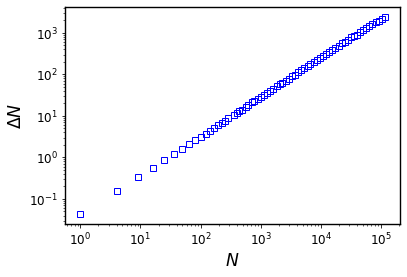

In [7]:
plt.plot(df.n, df.d, marker='s', ls='', mfc=(0,0,0,0), mec='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$N$')
plt.ylabel('$\Delta N$ ')

### corrlen = corrlength(corrData, fitting_range=1000)

Extract correlation length from spatial correlation DataFrame.
* corrData: pd.DataFrame object with columns ('R', 'C'), representing the distance and the correlation
* fitting_range: the range within which the curve fitting is done. The fitting is now set as polynomial fitting to the 8th degree. This is to improve the accuracy of correlation length locating. 

In [2]:
corrData = pd.read_csv(r'I:\Github\Python\Correlation\test_images\cl\result_test\60-2.csv')
corrlen = corrlength(corrData, fitting_range=1000)
corrlen

45

### div_field(img, pivData, winsize, step)

calculates the divergence fields $\nabla \cdot (c\boldsymbol{n})$ and $\nabla \cdot (c\boldsymbol{v})$
* img: the image from microscopy
* pivData: a DataFrame with columns (x, y, u, v)
* winsize and step should be consistent with the parameters of pivData, be extra coutious!

Return
* c: concentration field $\log(I_0/I)$
* v: velocity magnitude field $v$
* divcn: $\nabla \cdot (c\boldsymbol{n})$
* divcv: $\nabla \cdot (c\boldsymbol{v})$
* divv: $\nabla \cdot \boldsymbol{v}$

Example of use:

In [2]:
import corrLib
pivData = pd.read_csv(r'I:\Github\Python\Correlation\test_images\div\900-901.csv')
img = io.imread(r'I:\Github\Python\Correlation\test_images\div\900.tif')
c, v, divcn, divcv, divv = corrLib.div_field(img, pivData, 10, 10)

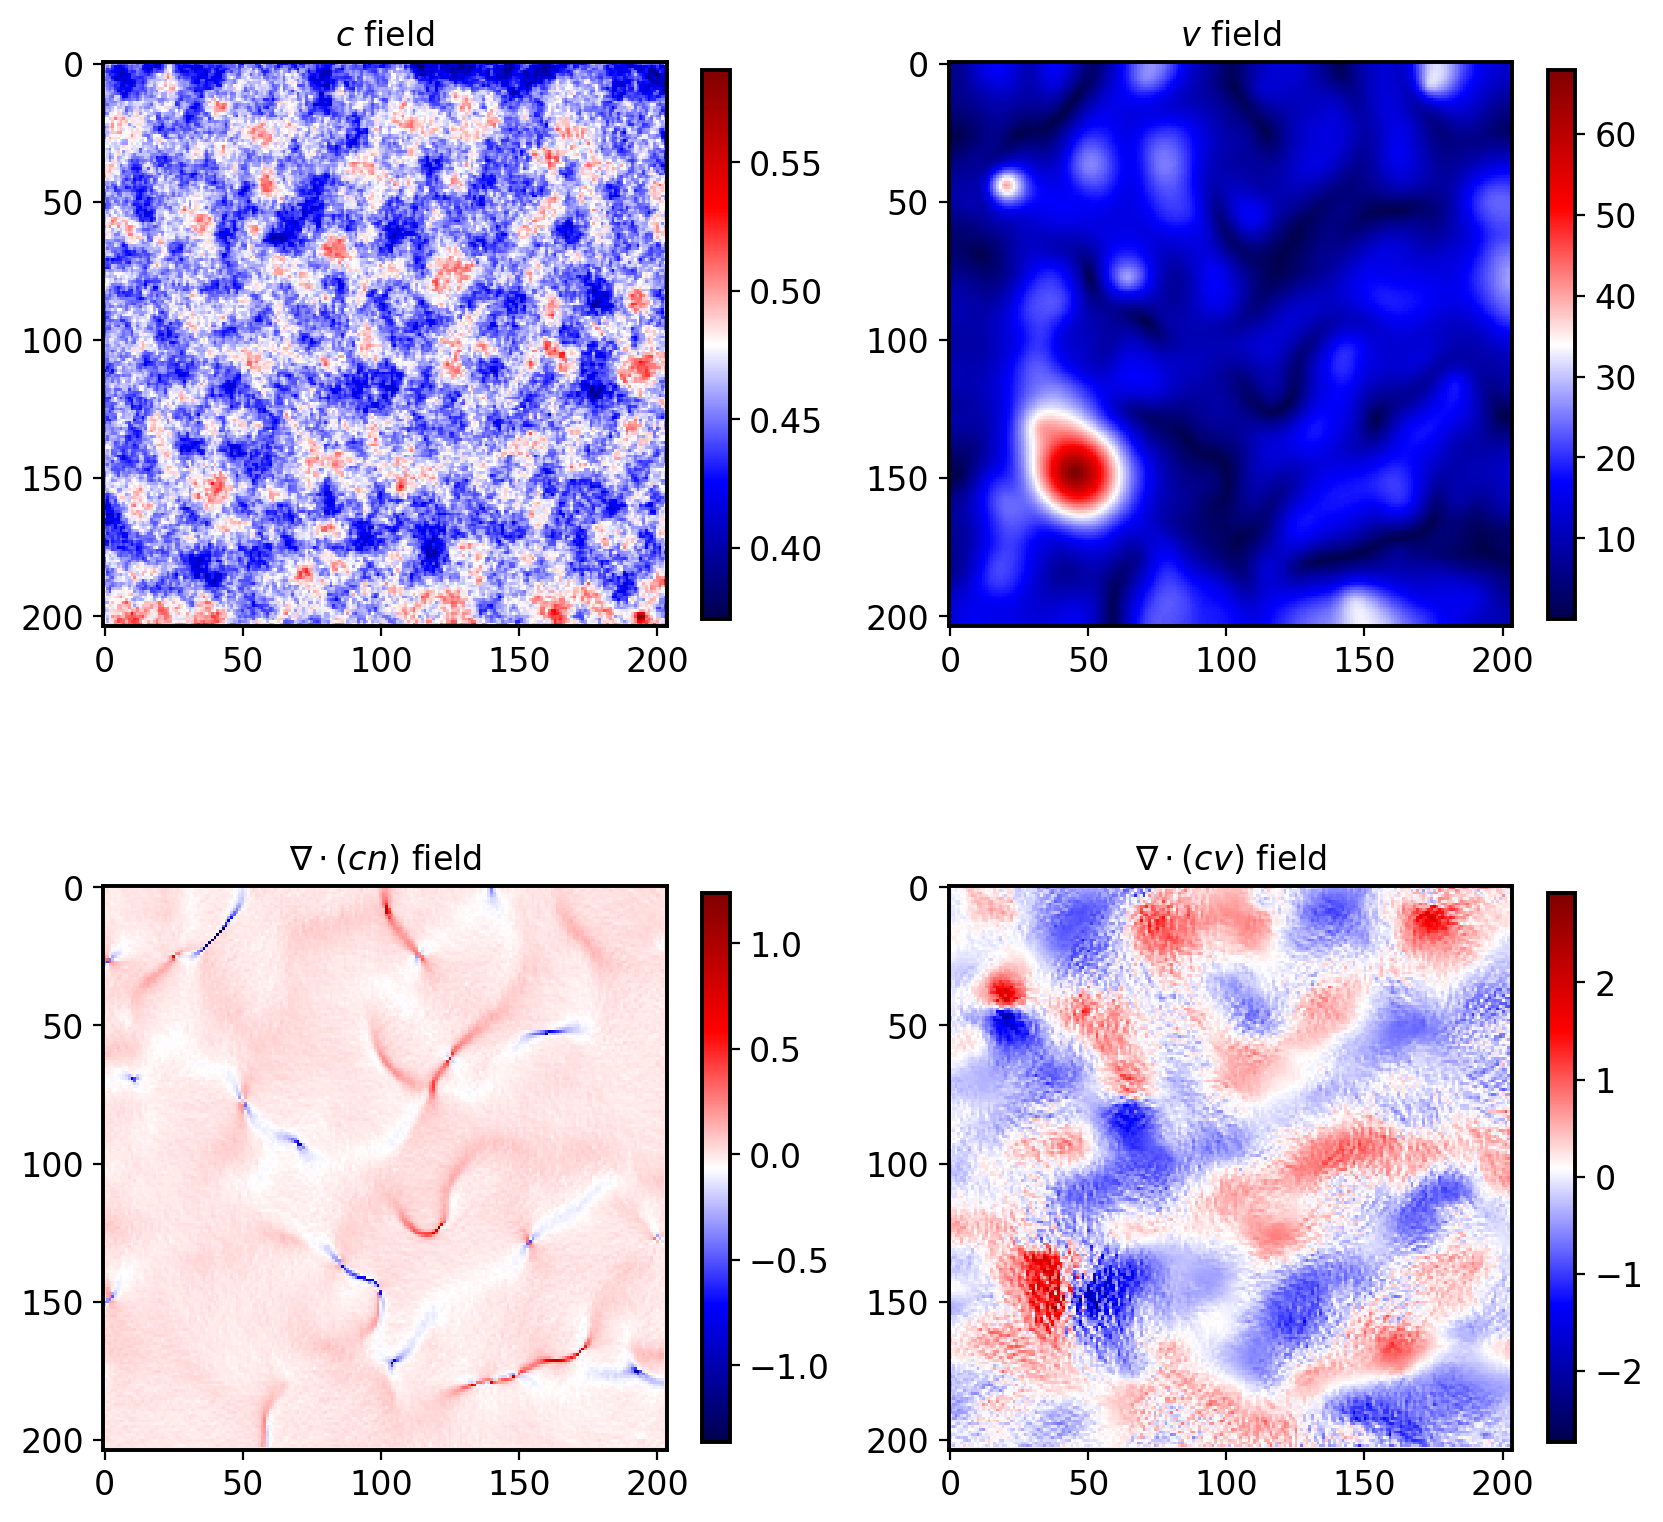

In [3]:
# Plot the results
import matplotlib as mpl
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=200)
ax[0, 0].imshow(c, cmap='seismic')
ax[0, 0].set_title('$c$ field')
ax[0, 1].imshow(v, cmap='seismic')
ax[0, 1].set_title('$v$ field')
ax[1, 0].imshow(divcn, cmap='seismic')
ax[1, 0].set_title('$\\nabla\cdot(cn)$ field')
ax[1, 1].imshow(divcv, cmap='seismic')
ax[1, 1].set_title('$\\nabla\cdot(cv)$ field')

normc = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
normv = mpl.colors.Normalize(vmin=v.min(), vmax=v.max())
normcv = mpl.colors.Normalize(vmin=divcv.min(), vmax=divcv.max())
normcn = mpl.colors.Normalize(vmin=divcn.min(), vmax=divcn.max())

plt.colorbar(mpl.cm.ScalarMappable(norm=normc, cmap='seismic'), ax=ax[0, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normv, cmap='seismic'), ax=ax[0, 1], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcn, cmap='seismic'), ax=ax[1, 0], shrink=0.8, drawedges=False)
plt.colorbar(mpl.cm.ScalarMappable(norm=normcv, cmap='seismic'), ax=ax[1, 1], shrink=0.8, drawedges=False)

### read data with specified extension in given folder
```python
def readdata(folder, ext='csv'):
    """
    Read data files with given extensions in a folder.
    
    Args:
    folder -- the folder to search in
    ext -- (optional) file extension of data files looked for, default to 'csv'
    
    Returns:
    fileList -- a DataFrame with columns 'Name' and 'Dir'
    """
```

In [5]:
import corrLib
folder = r'I:\Github\Python\Correlation\test_images\df_result'
corrLib.readdata(folder).head()

,Name,Dir
0,100-2,I:\Github\Python\Correlation\test_images\df_re...
1,40-2,I:\Github\Python\Correlation\test_images\df_re...
2,60-2,I:\Github\Python\Correlation\test_images\df_re...
3,80-2,I:\Github\Python\Correlation\test_images\df_re...


### temporal variation based density fluctuation analysis
```python
def df2(imgstack, size_min=5, step=250, method='linear'):
    """
    This is used for small scale test of temporal variation based density fluctuation analysis. 
    Here the input is a 3 dimensional array that contains all the images in a video [stack_index, height, width].
    For larger scale application, use the script df2.py or a later implementation of df2 which can take directory as argument 1.
    
    Args: 
    imgstack -- 3-D array with dimensions [stack_index, height, width]
    size_min -- minimal box size to sample
    step -- distance between adjacent boxes in a frame
    method -- use pixel intensity directly as concentration ('linear'), or use the log of it ('log')
    
    Returns:
    average -- the spatial average of temporal variations    
    """
```

### small scale test of gnf analysis
```python
def plot_gnf(gnf_data):
    """
    Used for small scale test of gnf analysis. 
    It incorporates the guide of the eye slope already in the function, which usually needs further adjustment when preparing paper figures.
    
    Args:
    gnf_data -- gnf data generated by df2()
    
    Returns:
    ax -- axis on which the data are plotted
    slope -- the slope of the gnf_data curve
    """
```

### Compute vorticity field based on piv data (x, y, u, v)
```python
def vorticity(pivData, step=None, shape=None):
    """
    Compute vorticity field based on piv data (x, y, u, v)
    
    Args:
    pivData -- DataFrame of (x, y, u, v)
    step -- distance (pixel) between adjacent PIV vectors
    
    Returns:
    vort -- vorticity field of the velocity field. unit: [u]/pixel, [u] is the unit of u, usually px/s
    """
```

### Compute convection term u.grad(c) based on piv data (x, y, u, v) and image
```python
def convection(pivData, image, winsize, step=None, shape=None):
    """
    Compute convection term u.grad(c) based on piv data (x, y, u, v) and image.
    
    Args:
    pivData -- DataFrame of (x, y, u, v)
    image -- the image corresponding to pivData
    winsize -- coarse-graining scheme of image
    step -- (optional) distance (pixel) between adjacent PIV vectors
    shape -- (optional) shape of piv matrices
    
    Returns:
    udc -- convection term u.grad(c). unit: [u][c]/pixel, [u] is the unit of u, usually px/s, [c] is the unit of concentration 
           measured from image intensity, arbitrary.
    """
```

### Compute divergence field based on piv data (x, y, u, v)
```python
def divergence(pivData, step=None, shape=None):
    """
    Compute divergence field based on piv data (x, y, u, v)
    
    Args:
    pivData -- DataFrame of (x, y, u, v)
    step -- distance (pixel) between adjacent PIV vectors
    
    Returns:
    vort -- vorticity field of the velocity field. unit: [u]/pixel, [u] is the unit of u, usually px/s
    """
```

### Compute local density fluctuations
```python
def local_df(img_folder, seg_length=50, winsize=50, step=25):
    """
    Compute local density fluctuations of given image sequence in img_folder
    
    Args:
    img_folder -- folder containing .tif image sequence
    seg_length -- number of frames of each segment of video, for evaluating standard deviations
    winsize --
    step --
    
    Returns:
    df -- dict containing 't' and 'local_df', 't' is a list of time (frame), 'std' is a list of 2d array 
          with local standard deviations corresponding to 't'
    """
```

### Compute energy spectrum in k space
```python
def compute_energy_density(pivData):
    """
    Compute kinetic energy density in k space from piv data.
    
    Args:
    pivData -- piv data
    
    Returns:
    E -- kinetic energy field in k space
    
    Test:
    pivData = pd.read_csv(r'E:\moreData\08032020\piv_imseq\01\3370-3371.csv')
    compute_energy_density(pivData)
    """
def compute_wavenumber_field(shape):
    """
    Compute the wave number field Kx and Ky, and magnitude field k. 
    Note that this function works for even higher dimensional shape.
    
    Args:
    shape -- shape of the velocity field and velocity fft field, tuple
    
    Returns:
    k -- wavenumber magnitude field
    K -- wavenumber fields in given dimensions
    
    Test:
    shape = (42, 50)
    k_mag, K = compute_wavenumber_field(shape)
    """
def energy_spectrum(pivData):
    """
    Compute energy spectrum (E vs k) from pivData.
    
    Args:
    pivData -- piv data
    
    Returns:
    es -- energy spectrum, DataFrame (k, E)
    """
```